In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.image as mpimg

## Three different Gaussian random variables, i.e., $X1$, $X2$ and $X3$ with $0$ mean and $1$ variance. 

In [13]:
M = 2000
X1 = np.random.normal(0, 1, M)
X2 = np.random.normal(0, 1, M)
X3 = np.random.normal(0, 1, M)
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))

## <font color='red'>1. Compute the covariance matrix of  $X1$, $X2$ and $X3$. Covariance matrix (CV) $$CV = \begin{bmatrix} cov(X1,X1) & cov(X1,X2)& cov(X1,X3)\\cov(X2,X1) & cov(X2,X2)& cov(X2,X3)\\cov(X3,X1) & cov(X3,X2)& cov(X3,X3)\end{bmatrix}.$$ Here, $$cov(X,Y)=E[XY]-E[X]E[Y]$$</font> 


In [2]:
def covmat(data_mat):
    size1 = float(data_mat[:,0].size)
    size2 = data_mat[0].size
    CV = np.zeros(shape=(size2,size2))
    mean_arr = np.zeros(shape=size2)
    for i in range(size2):
        mean_arr[i] = sum(data_mat[:,i])/size1
    for i in range(size2):
        for j in range(size2):
            a = data_mat[:,i]*data_mat[:,j]
            CV[i][j] = (sum(a)  - size1*mean_arr[i]*mean_arr[j])/size1
    return CV

[[0.08321056 0.00069005 0.00073194]
 [0.00069005 0.08301489 0.00155998]
 [0.00073194 0.00155998 0.08310382]]


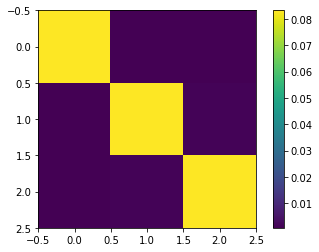

In [6]:
CV1 = covmat(X)
print(CV1)
fig=plt.figure()
plt.imshow(CV1)
plt.colorbar()

## <font color='red'>2. Generate three random variables as $X1$, $X2$ and $X1+X2$. Compute the covariance matrix</font> 

In [7]:
X1 =np.random.normal(0, 1, M)
X2 =np.random.normal(0, 1, M)
X3 = X1+X2
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))
CV2 = covmat(X)
print(CV2)
fig=plt.figure()
plt.imshow(CV2)
plt.colorbar()

[[1.0123784  0.00292903 1.01530742]
 [0.00292903 0.99463933 0.99756835]
 [1.01530742 0.99756835 2.01287577]]


## <font color='red'>3. Generate covariance matrix of correlated data. Take face images as the data.</font> 

[[-16354.60012522 -14246.51604614 -14245.30647319 -14557.76122766
  -15987.5130235  -16533.85277879]
 [-14246.51604614 -12438.46267815 -12414.67478852 -12688.2016277
  -13937.5356198  -14412.66278925]
 [-14245.30647319 -12414.67478852 -12432.98480126 -12686.65473454
  -13933.34908939 -14409.73408491]
 [-14557.76122766 -12688.2016277  -12686.65473454 -12986.96458123
  -14241.61305505 -14728.08677508]
 [-15987.5130235  -13937.5356198  -13933.34908939 -14241.61305505
  -15669.1158713  -16174.92234759]
 [-16533.85277879 -14412.66278925 -14409.73408491 -14728.08677508
  -16174.92234759 -16748.9134148 ]]


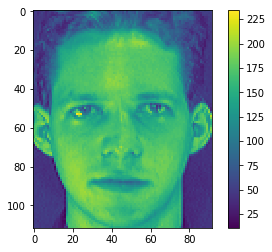

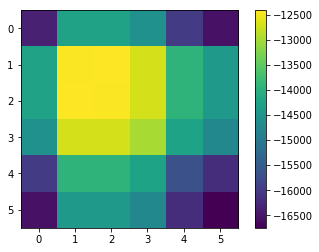

In [3]:
X1 = mpimg.imread('f1.pgm')
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X1 = X1.flatten()
X2 = mpimg.imread('f2.pgm').flatten()
X3 = mpimg.imread('f3.pgm').flatten()
X4 = mpimg.imread('f4.pgm').flatten()
e_value, e_vector = LA.eig(CV)
X5 = mpimg.imread('f5.pgm').flatten()
X6 = mpimg.imread('f6.pgm').flatten()
M = X6.size
X = np.transpose(np.reshape(np.array([X1,X2,X3,X4,X5,X6]),[6,M]))
CV3 = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV3)
plt.colorbar()

## <font color='red'>4. Show that data and noise are uncorrelated. Take Image files as your data and standard gaussian noise.</font> 

In [4]:
X1 = (X1-np.mean(X1))/np.std(X1) # FOR NORMALIZATION TO ZERO MEAN ONE VARIANCE
X2 = (X2-np.mean(X2))/np.std(X2)
X3 =(X3-np.mean(X3))/np.std(X3)
X4 = (X4-np.mean(X4))/np.std(X4)
X5 = (X5-np.mean(X5))/np.std(X5)
X6 = (X6-np.mean(X6))/np.std(X6)
M = X1.size
XN = np.random.normal(0,1, size=M)
X = X = np.transpose(np.reshape(np.array([X1,X2,X3,X4,X5,X6,XN]),[7,M]))
CV4 = covmat(X)
print(CV4)
fig=plt.figure()
plt.imshow(CV4)
plt.colorbar()

[[ 1.00000000e+00  6.86364063e-01  5.43393694e-01  5.76192802e-01
   3.72836320e-01  3.00766740e-01  1.07463217e-02]
 [ 6.86364063e-01  1.00000000e+00  4.36424961e-01  4.08870995e-01
   3.26988068e-01  1.18513726e-01 -4.64711788e-04]
 [ 5.43393694e-01  4.36424961e-01  1.00000000e+00  5.98566612e-01
   4.73639113e-01  3.97086330e-01 -6.12938122e-03]
 [ 5.76192802e-01  4.08870995e-01  5.98566612e-01  1.00000000e+00
   5.21458256e-01  3.60153830e-01 -5.81246909e-04]
 [ 3.72836320e-01  3.26988068e-01  4.73639113e-01  5.21458256e-01
   1.00000000e+00  2.89964477e-01 -2.80970303e-03]
 [ 3.00766740e-01  1.18513726e-01  3.97086330e-01  3.60153830e-01
   2.89964477e-01  1.00000000e+00 -3.45862851e-03]
 [ 1.07463217e-02 -4.64711788e-04 -6.12938122e-03 -5.81246909e-04
  -2.80970303e-03 -3.45862851e-03  1.04277357e+00]]


## Consider $X1$,$X2$ and $X3$ uniform random variables

[[0.08321056 0.00069005 0.00073194]
 [0.00069005 0.08301489 0.00155998]
 [0.00073194 0.00155998 0.08310382]]


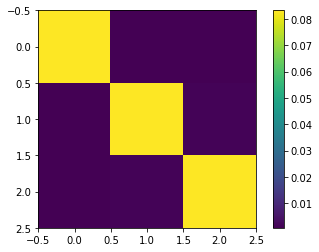

In [5]:
X1 = np.random.uniform(0, 1, M)
X2 = np.random.uniform(0, 1, M)
X3 = np.random.uniform(0, 1, M)
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))
CV5 = covmat(X)
print(CV5)
fig=plt.figure()
plt.imshow(CV5)
plt.colorbar()

## <font color='red'>5. Verify the properties of the covariance matrix.</font>

### <font color='red'> a) Symmetric,i.e.,$C_X = C_X^T.$ </font> 

In [8]:
print(CV-CV.T)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


### <font color='red'> b) Its eigenvalues are greater than equal to zero</font>

In [9]:
from numpy import linalg as LA
e_value, e_vector = LA.eig(CV)
print(e_value,"\n",e_vector)

[3.19127782 1.04365095 0.96907306 0.26221962 0.68869514 0.40615732
 0.48169967] 
 [[ 4.57911297e-01  4.53177057e-02 -3.35063876e-01  7.35262562e-01
  -2.85169379e-01  2.27266207e-01 -4.91244317e-02]
 [ 3.90301470e-01  5.19529833e-02 -5.87768280e-01 -5.64854037e-01
  -1.88081045e-01 -1.47761190e-01 -3.51035850e-01]
 [ 4.50198831e-01 -2.01165863e-02  1.22935595e-01  3.71070737e-02
   1.39295676e-02 -7.11159147e-01  5.23913041e-01]
 [ 4.54395291e-01 -9.86720481e-03  1.07049406e-01 -3.25743060e-01
   1.93016312e-01  6.42896039e-01  4.74646002e-01]
 [ 3.80038205e-01 -2.56691155e-02  2.15266829e-01  1.33252580e-01
   7.23489280e-01 -7.70423449e-02 -5.11315695e-01]
 [ 2.90514842e-01 -6.04729620e-02  6.78294121e-01 -1.22382495e-01
  -5.67744614e-01  3.75713952e-02 -3.36360225e-01]
 [-1.65998790e-04  9.95203131e-01  9.62558551e-02 -1.04728590e-02
   9.16141773e-03 -1.03402118e-02  2.23131998e-03]]


### <font color='red'> c) It is positive semi-definite, i.e., for any real valued vector $a$,$$a^TC_Xa\geq0$$ </font>

In [10]:
a = np.random.rand(np.size(CV,0),1)
b = np.matmul(a.T,CV)
c = np.matmul(b,a)
print(c)

[[5.63354667]]


## <font color='red'>6. Compute correlation coefficient matrix.</font>
Hint: you may require np.mean,np.prod,and np.std

In [11]:
def corr(data_mat):
    size1 = float(data_mat[:,0].size)
    size2 = data_mat[0].size
    CR = np.zeros(shape=(size2,size2))
    mean_arr = np.zeros(shape=size2)
    std_arr = np.zeros(shape=size2)
    for i in range(size2):
        mean_arr[i] = sum(data_mat[:,i])/size1
        std_arr[i] = np.std(data_mat[:,i])
    for i in range(size2):
        for j in range(size2):
            a = data_mat[:,i]*data_mat[:,j]
            CR[i][j] = (sum(a)  - size1*mean_arr[i]*mean_arr[j])/(size1*std_arr[i]*std_arr[j])
    return CR

[[ 1.          0.00759361 -0.00727683]
 [ 0.00759361  1.          0.00382485]
 [-0.00727683  0.00382485  1.        ]]


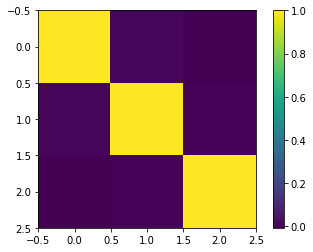

In [14]:
CR = corr(X)
print(CR)
fig=plt.figure()
plt.imshow(CR)
plt.colorbar()